# Goal

This post aims to describe two solutions using recurrent function and queue for [104. Maximum Depth of Binary Tree](https://leetcode.com/problems/maximum-depth-of-binary-tree/).

![image](https://user-images.githubusercontent.com/8764683/61162891-ab7e0500-a545-11e9-8971-a226a4408aaf.png)


<!-- TEASER_END -->

# Define a binary tree object

In [1]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

## Utility Functions for a tree

In [82]:
from collections import deque
def list_to_TreeNode(l):
    """
    :type l: list
    :rtype: a TreeNode object
    """

    iter_l = iter(l)
    node = TreeNode(next(iter_l))
    branch = deque([node])
    while True:
        head = branch.popleft()
        try:
            next_iter = next(iter_l)
            if next_iter is not None: 
                head.left = TreeNode(next_iter)
                branch.append(head.left)

            next_iter = next(iter_l)
            if next_iter is not None: 
                head.right = TreeNode(next_iter)
                branch.append(head.right)
        except StopIteration:
            break
    return node

In [83]:
from graphviz import Digraph


def add_nodes_edges(tree, parent=None, dot=None):
    # Create Digraph object
    if dot is None:
        dot = Digraph()
        
    if tree is None:
        return dot
        
    # Add node 
    dot.node(name=str(tree), label=str(tree.val))

    if parent is not None:
        # Add the edge between the node and its parent
        dot.edge(str(parent), str(tree))

    # Repeat for the children
    dot = add_nodes_edges(tree.left, tree, dot=dot)
    dot = add_nodes_edges(tree.right, tree, dot=dot)

    return dot


def visualize_tree(tree):
    """
    :type tree: a TreeNode object
    :rtype: graphviz dot object
    """

    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)

    return dot

In [84]:
l_tree = [3,9,20,None,None,15,7]
btree = list_to_TreeNode(l_tree)

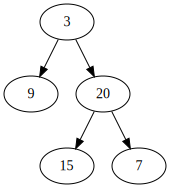

In [85]:
dot = visualize_tree(btree)

# Solution using a recurrent function
Recurrently the depth is calculated from leaf to the top node. The maximum depth is returned to the next upper level. 


<img src=https://user-images.githubusercontent.com/8764683/61162388-504b1300-a543-11e9-860f-7fbfaddc2398.png style="height: 300px">


In [56]:

class Solution(object):
    def maxDepth(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """
        if not root:
            print('Reached to the leaf')
            return 0
        
        print(f'Processing the node @ {root.val}')
        print(f'checking Left node')
        left = self.maxDepth(root.left) + 1
        print(f'checking Right node')
        right = self.maxDepth(root.right) + 1
        
        print(f'Left depth: {left}, Right depth: {right}')
        print()
        
        if left > right:
            return left
        else:
            return right
        

In [57]:
s = Solution()
s.maxDepth(btree)

Processing the node @ 3
checking Left node
Processing the node @ 9
checking Left node
Processing the node @ None
checking Left node
Reached to the leaf
checking Right node
Reached to the leaf
Left depth: 1, Right depth: 1

checking Right node
Processing the node @ None
checking Left node
Reached to the leaf
checking Right node
Reached to the leaf
Left depth: 1, Right depth: 1

Left depth: 2, Right depth: 2

checking Right node
Processing the node @ 20
checking Left node
Processing the node @ 15
checking Left node
Reached to the leaf
checking Right node
Reached to the leaf
Left depth: 1, Right depth: 1

checking Right node
Processing the node @ 7
checking Left node
Reached to the leaf
checking Right node
Reached to the leaf
Left depth: 1, Right depth: 1

Left depth: 2, Right depth: 2

Left depth: 3, Right depth: 3



3

# Solution using queue
This solution lists up all nodes belonging to the node at the same depth, and throughly listing up their child node repeatedly. When all of the listed nodes is checked, the count of depth is increased. 

<img src=https://user-images.githubusercontent.com/8764683/61162841-986b3500-a545-11e9-8768-07dc1a6c6152.png style="height: 300px">


In [34]:
from collections import deque

class Solution(object):
    def maxDepth(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """
        ret = 0
        if not root:
            return ret

        queue = deque([root])
        while queue:
            print()
            print(f'At the Depth: {ret}')
            print(f'queue: {[node.val for node in queue]}')
            size = len(queue)
            print(f'Found [{size}] nodes at this depth')
            for i in range(size):
                root = queue.popleft()
                if root.left is not None:
                    queue.append(root.left)
                if root.right is not None:
                    queue.append(root.right)
            
            ret += 1

        return ret

In [35]:
s = Solution()
s.maxDepth(btree)


At the Depth: 0
queue: [3]
Found [1] nodes at this depth

At the Depth: 1
queue: [9, 20]
Found [2] nodes at this depth

At the Depth: 2
queue: [None, None, 15, 7]
Found [4] nodes at this depth


3